# Steps

## Creating the Dataset

1. Use the [json file](/content/face_detection/face_detection.json) provided by the [kaggle challenge](https://www.kaggle.com/dataturks/face-detection-in-images) to download all images to data directory
2. 

## Clone and setup YOLOv5
1. git clone the repo (to get scripts, model)
2. download the weights (yolov5x.pt)

## Run detections at IoU 0.6
use `scripts/detect.py` to run inference/ detections on all the images in the data directory.

## Compare detections with GT.
Here is where we can check if YOLOv5 has some built-in facility to do this for us.


### Setup env

In [1]:
# Download the face_detections.jsom from github
!mkdir -p /content/face_detection
!rm -rf "/content/face_detection/*"
!curl "https://raw.githubusercontent.com/G-I-Joe/learn-yolo/main/image-detection/yolov5/face_detection.json" -o /content/face_detection/face_detection.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  267k  100  267k    0     0   961k      0 --:--:-- --:--:-- --:--:--  961k


In [2]:
jsonpath = "/content/face_detection/face_detection.json"
!wc -l "/content/face_detection/face_detection.json"

409 /content/face_detection/face_detection.json


In [3]:
from pathlib import Path
from tqdm import tqdm
import numpy as np
import json
import urllib.request
import PIL.Image as Image
import cv2

import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline


In [4]:
data = []
with open(jsonpath) as f:
  for line in f:
    data.append(json.loads(line))

print(f"loaded {len(data)} items.")

loaded 409 items.


In [5]:
data[0]
p = data[0]["content"]

Path(jsonpath).parent / "images" / Path(p).name

PosixPath('/content/face_detection/images/8186c3d1-e9d4-4550-8ec1-a062a7628787___0-26.jpg.jpeg')

In [6]:
categories = []
for item in data:
  annotations = item['annotation']
  for annotation in annotations:
    categories.extend(annotation['label'])
categories = list(set(categories))
print(categories)

['Face']


### Download all images to data directory



In [7]:
!mkdir -p /content/face_detection/images
!rm /content/face_detection/images/*

rm: cannot remove '/content/face_detection/images/*': No such file or directory


In [8]:
img_dir = Path(jsonpath).parent / "images"

for item in tqdm(data):
  link = item['content']
  filename = Path(link).name
  img = urllib.request.urlopen(link)
  img = Image.open(img)
  img = img.convert('RGB')
  img.save(img_dir / filename, "JPEG")


100%|██████████| 409/409 [03:37<00:00,  1.88it/s]


### Inspect one sample

In [19]:
data[0]

{'annotation': [{'imageHeight': 333,
   'imageWidth': 650,
   'label': ['Face'],
   'notes': '',
   'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
    {'x': 0.1723076923076923, 'y': 0.45345345345345345}]},
  {'imageHeight': 333,
   'imageWidth': 650,
   'label': ['Face'],
   'notes': '',
   'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
    {'x': 0.6584615384615384, 'y': 0.46846846846846846}]}],
 'content': 'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb064277d86016431e33e4e003d/8186c3d1-e9d4-4550-8ec1-a062a7628787___0-26.jpg.jpeg',
 'extras': None}

In [29]:
p = data[0]["content"]
boxes = data[0]["annotation"]
rectangles = []
for box in boxes:
  rectangles.append([ 
                     {"x": int(point["x"]*box["imageWidth"]),
                      "y": int(point["y"]*box["imageHeight"])
                      } 
                     for point in box["points"]
                     ])

rectangles

[[{'x': 56, 'y': 102}, {'x': 112, 'y': 151}],
 [{'x': 379, 'y': 97}, {'x': 428, 'y': 156}]]

Opening /content/face_detection/images/8186c3d1-e9d4-4550-8ec1-a062a7628787___0-26.jpg.jpeg
Add rectangle (56, 102) -> (112, 151)
Add rectangle (379, 97) -> (428, 156)


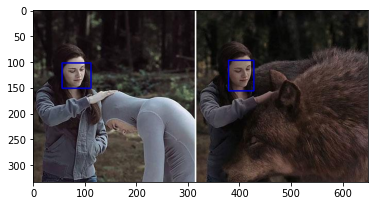

In [34]:
a_sample_location = Path(jsonpath).parent / "images" / Path(p).name
print(f"Opening {a_sample_location}")

img = cv2.imread(str(a_sample_location))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for tl, br in rectangles:
  print(f"Add rectangle {(tl['x'], tl['y'])} -> {(br['x'], br['y'])}")
  cv2.rectangle(img, (tl['x'], tl['y']), (br['x'], br['y']), (0, 0, 200), 2)

plt.imshow(img)

### Clone the YOLO repo

In [35]:
!mkdir -p /content/src
!git clone https://github.com/ultralytics/yolov5.git /content/src/yolov5

Cloning into '/content/src/yolov5'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 3319 (delta 17), reused 18 (delta 8), pack-reused 3283
Receiving objects: 100% (3319/3319), 6.52 MiB | 1.23 MiB/s, done.
Resolving deltas: 100% (2207/2207), done.


### download the weights (yolov5x.pt)

In [41]:
# Weights are at https://github.com/ultralytics/yolov5/releases/download/v3.1/yolov5x.pt
!curl "https://github.com/ultralytics/yolov5/releases/download/v3.1/yolov5x.pt" -L -o /content/face_detection/yolov5x.pt
!md5sum /content/face_detection/yolov5x.pt
# Expect
# 437d9ea7827427d81cf39863de3ed64f  /content/face_detection/yolov5x.pt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   636  100   636    0     0  14133      0 --:--:-- --:--:-- --:--:-- 14133
100  170M  100  170M    0     0  28.3M      0  0:00:05  0:00:05 --:--:-- 34.3M
437d9ea7827427d81cf39863de3ed64f  /content/face_detection/yolov5x.pt
